# Práctica 2: clasificación de dígitos MNIST mediante AdaBoost

# **Introducción**

Para esta segunda práctica se nos pide la implementación de un algoritmo de Aprendizaje Automatico Supervisado (Machine Learning), este algoritmo consiste en la detección de números manuscritos.

El gran objetivo de esta práctica es entender como funcionan los algoritmos de *aprendizaje supervisado*, además, entender como funciona el algoritmo AdaBoost, ya que, tendremos que implementar dicho algoritmo desde cero para que funcione correctamente el sistema de reconocimiento de números.

# **Conceptos Previos**

Antes de meternos de lleno con la implementación, tenemos que tener un poco de contexto sobre que vamos a realizar.

## **Aprendizaje Automatico**

El **Aprendizaje Automático** o Machine Learning es una rama de la Inteligencia Artificial, se entiende como un tipo de aprendizaje que brinda a las máquinas la capacidad de aprender, como si se tratasen de seres humanos. La idea detrás de esto es que dado una serie de datos la máquina va aprendiendo "patrones" de manera que al enfrentarse a nuevos datos de entrada la máquina sabrá reconocer esos nuevos patrones.

Tenemos distintos tipos de **Machine Learning**
* **Aprendizaje Supervisado:**
Es el que empleamos nosotros, se trata del aprendizaje supervisado, ya que sabemos que etiquetas se corresponden con los datos de entrada, esto se traduce en que podemos saber si ha clasificado bien o mal.

* **Aprendizaje por refuerzo:** 
Este tipo de aprendizaje se basa en prueba y error.

* **Aprendizaje No Supervisado:**
Este aprendizaje, a diferencia de los otros dos, busca similitudes con los datos con los que se ha entrenado, en este caso, los algoritmos no están programados para detectar un tipo específico de datos, como ocurría con las imágenes de perros, sino que buscan ejemplos que se parezcan y puedan agrupar. 

Hay dos cuestiones muy importantes a la hora de elegir un tipo específico, la primera es, ¿Tenemos una gran cantidad de datos de entrenamiento? La segunda es, ¿Tenemos una gran capacidad de cómputo?

Si ambas respuestas son afirmativas, entonces nos decantaríamos por el Aprendizaje No Supervisado, ya que este tipo de aprendizaje necesita una capacidad de datos de entrenamiento enorme, además de una potencia de cómputo brutal, aunque también tendríamos que tener en cuenta la dificultad del problema al que nos estamos enfrentando.

A modo de concluir este apartado, se puede decir que el Machine Learning ha tenido un crecimiento brutal en los últimos 20 años, ya que se han diseñado un sinfín de cosas gracias a ello, además de saber que esta tecnología está presente en un sinfín de aplicaciones a día de hoy, por ejemplo, se usa para las recomendaciones de Netflix o Spotify, Asistentes de Voz (Siri o Google Assistant), Vehículos Autónomos, Sistemas de Seguridad, etc.

## **Boosting**

### **Introducción**

El término Boosting hace referencia a los algoritmos que a partir de unos modelos simples podemos llegar a unos más complejos con el paso del tiempo, estos modelos simples se les conoce como **clasificadores débiles**, los modelos más complejos son los **clasificadores fuertes**, la idea detrás de Boosting es que dado unos datos de entrada, iremos creando clasificadores débiles que irán clasificando estos datos, estos clasificadores débiles tan solo nos indican si está bien o mal, por así decirlo, lo interesante de esto, es que en cada nueva iteración, el algoritmo indica que datos han sido más complejos de clasificar, por lo que los nuevos clasificadores débiles harás más énfasis en esos datos más complejos, por lo que podemos ver, la ejecución de este tipo de algoritmos es secuencial, ya que el siguiente clasificador débil depende del actual. Al terminar el entrenamiento, tendremos el modelo final o clasificador fuerte, con este modelo ya podemos realizar hipótesis sobre un dato concreto.

Finalmente, a la hora de dar una hipótesis para una dato en concreto, lo que hace es que cada clasificador débil tendrá un peso mayor o menor en la votación, esto es bueno, ya que podríamos tener un clasificador débil en el clasificador fuerte que sea muy malo, de esta forma no repercutirá negativamente en el resultado final. 

### **AdaBoost**

Ahora hablaremos de AdaBoost (Adaptative Boosting) que es un algoritmo que emplea Boosting para su funcionamiento.


**AdaBoost o **Adaptative Boosting** es un algoritmo basado en **Boosting**, nos basaremos en el pseudocodigo proporcionado para su explicación, lo podemos ver en la siguiente celda.

FOTO

Como se puede apreciar en el pseudocodigo, vemos que recibimos dos variables por parametro.

* **X:** Este es el conjunto de entrenamiento para nuestro algoritmo.
* **Y:** Son las etiquetas de cada dato del conjunto de entrenamiento, nos será útil para realizar distintos calculos.

Luego podemos apreciar que tenemos una variable D, esto se define como la distribución de probabilidad del conjunto X, es decir, nos indica la dificultad que tiene clasificar cada dato, más adelante veremos que esta distribucción de probabilidad, en una primera instancia, todas las imagenes tendrán la misma distribución de probabilidad, es decir, 1 / tamaño del conjunto.

Luego vemos que tenemos un primer bucle, antes vamos a comentar que es T y A, T se entiende como la cantidad de clasificadores débiles que van a formar nuestro clasificador fuerte, por su parte, A serán las pruebas aleatorias que haremos para quedarnos con un clasificador débil, esto lo hacemos para intentar quedarnos con el clasificador débil que menos error tenga.

Una vez entendido eso, tenemos el primer bucle, que itera hasta T, en cada iteración de T tenemos que buscar un clasificador débil con un error bajo, por eso realizamos el segundo buclede 0 hasta A, en cada iteración de este bucle creamos un clasificador débil al azar, basicamente, creamos los datos que lo compongan de manera azarosa.

Cuando se ha generado se ha de calcular su error, el error lo calculamos aplicando el clasificador debil a todo el conjunto de entrenamiento, si la predicción que hace el clasificador debil es distinta de la etiqueta real el error aumenta en el valor que nos indique la posición i-esima del vector de D (distribución de probabilidad).




Una vez tenemos el mejor clasificador sobre las A pruebas aleatorias, tenemos que calcular su confianza, la confianza la calculamos con la siguiente formula.

$alpha = \frac{1}{2} * \log_{2}
\frac{1 - error}{error}$

Cuando se ha calculado la confianza del mejor clasificador, tenemos que actualizar el vector de distribucción de probabilidad.

El calculo lo hacemos con las siguientes formulas.

$D_{t+1} = \frac{D_t (i) * e^{-\alpha * y_{i} * h_{t} (x_{i})}} {Z_{t}}$

$Z_{t} = \sum_{i} D_{t} (i)$

Lo que primero hacemos es actualizar el vector de D, es la parte de arriba del numerador de la primera formula. Para ello recorremos todo el vector de entrenamiento, y a la posición i-esima del vector D se le multiplica el número *e* elevado a la -confianza por 1 o -1, 1 será cuando se ha acertado la predicción y -1 cuando la predicción falla.

En la siguiente tabla vemos porque se multiplica.

\begin{align}
        \text{valor} = \left\{
        \begin{array}{cl}
        1 & prediccion = 1 & real = 1 \\
        1 & prediccion = -1 & real = -1 \\
        -1 & prediccion = 1 & real = -1 \\
        -1 & prediccion = -1 & real = 1 \\
        \end{array}
        \right.
    \end{align}
Asi pues, si la predicción es igual a la etiqueta se elevará a $-\alpha$, mientras que si la predicción difiere de la etiqueta real, se elevará a $\alpha$.

Luego calulamos la $Z_{t}$, para ello tenemos que sumar todas las posiciones del vector D.

Cuando ya tenemos calculado el denominador y la $Z_{t}$, procedemos a realizar la división, basicamente dividimos cada posicion del vector de distribucción entre la $Z_{t}$ calculada, esto se conoce como normalizar la muestra, si no podriamos tener valores que superan un limite.


Lo explicado anteriormente, se hará T veces como he dicho, cuando esto ha acabado tendremos el clasificador fuerte, este estará formado por una lita de T clasificadores débiles, y ya podremos operar con el clasificador fuerte.

La ultima linea del pseudocodigo hace referencia al calculo de la hipotesis, se emplea la siguiente formula.

$H(x) = sign(\sum_{t} \alpha_{t} * h_{t} (x)) $

Lo que entendemos de la formula es que dado un dato cualquiera del conjunto, podemos saber su pertecencia aplicando todos los clasificadores debiles del clasificador fuerte a esa imagen, es decir, iteramos sobre los clasificadores debiles, en cada iteracion acumulamos el resultado de aplicar el clasificador debil al dato, y lo multiplicamos por la confianza del clasificador debil, esto iterara T veces.

Al final, cuando hemos terminado de iterar, devolvemos el signo de la acumulación, es decir, al final si la acumulación es mayor que cero devolvemos un 1, si es menor o igual a cero devolvemos un -1, esto lo podemos ver en la siguiente tabla.

\begin{align}
        \text{H}(x) = \left\{
        \begin{array}{cl}
        1 & acumulacion >  1 \\
        -1 & aculacion \leq 0.
        \end{array}
        \right.
    \end{align}

# **Implementación**

La implementación constará de distintos apartados, empezaremos desde lo más básico y profundizaremos cada vez más, hasta llegar al algoritmo AdaBoost.

## **Importación de las librerías necesarias**

Tenemos que importar las librerías necesarias para trabajar de una manera eficiente.
Usaremos **numpy** para tratar las matrices y vectores y realizar operaciones sobre estos.

Usaremos **matplotlib** para mostrar las gráficas necesarias.

Usaremos **Keras** para descargar el conjunto de entrenamiento y test de MNIST de forma dinámica.

Usaremos **random** para generar números aleatorios, útil al generar los clasificadores débiles.

Finalmente, usaremos **math** para realizar cálculos matemáticos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random as rd
import math
from tqdm import tqdm

## **Importación de la base de datos MNIST**

Descargamos usando una función que nos proporciona Keras la base de datos MNIST, concretamente el conjunto de entrenamiento y el conjunto de Test.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Tras la descarga, podemos guardar base de datos en un fichero

In [ ]:
np.savez("mnist",x=x_train,y=y_train)


Si hemos guardado la base de datos, podemos cargarla desde un fichero.

In [ ]:
npzfile = np.load("mnist.npz")
mnist_X = npzfile['x']
mnist_Y = npzfile['y']

## **Adaptación de los arrays de imágenes y etiquetas para AdaBoost**

La adaptación consiste en adaptar, valga la redundancia, los conjuntos de entrenamiento y test, de manera que puedan funcionar de acuerdo a las especificaciones de nuestro programa, aunque esto lo comentaré detalladamente más adelante, nuestro programa funciona con vectores de imagenes de 784 posiciones, por lo que las imagenes que trae MNIST para entrenar hay que adaptarlas a ese tamaño, cada imagen es una matriz de 28 pixeles de ancho y 28 de alto, para que se convierta en un vector de 784 posiciones usaremos la función reshape de *numpy*, le indicaremos como primer parametro cuantas queremos adaptar, serán todas, y como segundo parametro le indicaremos la nueva forma.

Al vector de etiquetas no hay que hacer nada, tan solo devolver una copia.

In [ ]:
def adaptar_conjuntos(mnist_X, mnist_Y):
    X = mnist_X.reshape(len(mnist_X), 784)
    Y = mnist_Y
    return (X, Y)


(X, Y) = adaptar_conjuntos(mnist_X, mnist_Y)

## **Creación de conjuntos**

### **Dividir Conjuntos**

Una vez hemos hecho la adaptación anterior, tenemos que dividir el conjunto de entrenamiento en dos conjuntos, el de entrenamiento y el de validación.

La división hacemos en base a un porcentaje, por ejemplo 80% para entrenar y el resto para validar, o 90% para entrenar y el 10% restante para validar.

Esto lo realizamos con la siguiente función.

In [ ]:
def split_train_validation_set(X, Y, div):
    #Luego sacar el 50% de num y otro 50% de aleatorio -> Tanto para train como validation
    N = int(div*len(X))
    X_Train = X[0:N].copy()
    X_Validation = X[N:len(X)].copy()

    Y_Train = Y[0:N].copy()
    Y_Validation = Y[N:len(X)].copy()


    return (X_Train, X_Validation, Y_Train, Y_Validation)

### **Crear Conjunto Entrenamiento/Validación/Test**

Una vez que hemos realizado la división, para entrenar un digito tenemos que crear un conjunto especifico para ese digito, la idea es mirar cuantas etiquetas coinciden con el digito a entrenar, ese numero formará el 50% del conjunto de entrenamiento de ese número, y 50% restante tendrá la misma cantidad de datos que el otro 50% pero de números distintos del digito a entrenar.

Por ejemplo:

Si estamos entrenando para el digito 0 y usamos 30000 imagenes como entrenamiento, si vemos que tenemos 1000 ceros, esos 1000 ceros serán el 50% y el resto serán otros digitos. Al final tendremos un conjunto de entrenamiento para el digito cero de tamaño 2000.

En esta función también hacemos que las etiquetas que coindicen con el número a entrenar se pongan a 1 mientras que las demás a -1, esto es útil debido a la forma en la que usamos la práctica.

In [ ]:
def creaConjunto(X, Y, dig):
    #Filtro donde cada elemento de Y es igual al digito
    filtro = np.where(Y == dig)
    no_filtro = np.where(Y != dig)

    #Cogemos los que coincidan
    imagenes_clase = X[filtro]
    imagenes_noclase = X[no_filtro]

    etiquetas_clase = Y[filtro]
    etiquetas_noclase = Y[no_filtro]

    ocasiones = int(len(etiquetas_clase))

    #Limitamos al 50% 
    etiquetas_noclase = etiquetas_noclase[:ocasiones]
    imagenes_noclase = imagenes_noclase[:ocasiones]
    
    #Juntamos las imagenes y las etiquetas
    imagenes = np.concatenate((imagenes_clase, imagenes_noclase), axis=0)
    etiquetas = np.append(etiquetas_clase, etiquetas_noclase)
    etiquetas = np.where(etiquetas == dig, 1, -1)
    
    return (imagenes, etiquetas)

## **Clasificadores Débiles**

Un clasificador débil es un modelo muy simple que nos va a indicar la pertenencia de un numero a una clase concreta.

En nuestro algoritmo un clasificador débil se genera con los siguientes datos.

* Pixel: Es el pixel que indexará en cada imagen del conjunto a probar, en nuestro caso generaremos un valor entre 0 y 784 (no incluido).
* Umbral: Esto nos servirá para cuando tenemos que aplicar el clasificador débil, al estar usando imagenes en escala de grises el valor a generar estará entre 0 y 255.
* Dirección: Este valor se usará para ver en que plano tenemos que mirar, se elige un valor entre -1 o 1, -1 para el plano negativo y 1 para el plano positivo.
* Error: Este valor nos va a servir para guardar el error del clasificador tras aplicarlo a todo el conjunto, se inicializa en 0.
* Confianza: Este valor nos indica como de bueno es un clasificador, cuanto más alto este valor mejor, se inicializa en 0.

La siguiente clase define lo que acabo de comentar.

In [ ]:
class clasificador_debil():
    def __init__(self, pixel, umbral, dir):
        self.pixel = pixel
        self.umbral = umbral
        self.dir = dir
        self.error = 0
        self.confianza = 0
        
    def __repr__(self):
        return "Pixel: " + str(self.pixel) + ", Umbral: " + str(self.umbral) + ", Error: " + str(self.error) + " Confianza: " + str(self.confianza)


En el parrafo anterior he comentado los valores que el clasificador débil puede tener, a modo de resumen tendrá 3 que parten con un valor al azar, el pixel, umbral y dirección.

El error y la confianza se inicializan dentro del constructor a cero.

In [ ]:
# Dimensión con la que vamos a trabajar. En nuestro caso 28*28
def generar_clasificador_debil(dimension_datos):
    pixel = rd.randint(0, dimension_datos-1)
    umbral = rd.randint(0, 255)
    dir = rd.choice([-1, 1])
    
    return clasificador_debil(pixel, umbral, dir)

La función aplicar clasificador débil recibe dos parametros, una imagen y el clasificador debil.

La logica es muy sencilla, tenemos dos casos.
* Dirección igual a 1: En este caso tenemos que ver la parte positiva del plano como he dicho, lo que hacemos es ver si el pixel que hemos generado al azar, indexandolo en la imagen es mayor que el umbral, si se cumple entonces indicamos que la predicción es correcta, si no, indicamos que la prediccón es incorrecta.
* Dirección igual a -1: En este caso tenemos que ver la parte negativa del plano como he dicho, lo que hacemos es ver si el pixel que hemos generado al azar, indexandolo en la imagen es menor que el umbral, si se cumple entonces indicamos que la predicción es correcta, si no, indicamos que la prediccón es incorrecta.


In [ ]:
def aplicar_clasificador_debil(c_d, imagen):
    #Tenemos que ver la dirección
    #Si la direccion es positiva, miramos en la parte positiva del plano
    if c_d.dir == 1:
        if imagen[c_d.pixel] >= c_d.umbral:
            return 1
    elif c_d.dir == -1:
        if imagen[c_d.pixel] < c_d.umbral:
            return 1

    return -1

Para obtener el error de un clasificador es muy sencillo, a esta función le pasamos el clasificador débil, el conjunto de entrenamiento X, las etiquetas Y y el vector de pesos D.

La idea es que tenemos que recorrer el conjunto de imagenes, en cada iteración tenemos que ver si la predicción del clasificador débil coincide con la etiqueta, en caso de que no coincida la predicción con lo real aumentamos en el valor de la posición i-esima del vector de distribución de probabilidades D.

In [ ]:
def obtener_error(clasificador, X, Y, D):
    error = 0.0
    for i, img in enumerate(X):
        if aplicar_clasificador_debil(clasificador, img) != Y[i]:
            error += D[i]
    
    clasificador.error = error
    return error

## **Adaboost**

### **Implementación AdaBoost**

Una vez tenemos claro lo que es un clasificador débil, pasamos a implementar AdaBoost, ya he explicado con anterioridad como funciona, así que algo a destacar es que le pasamos por parametros de A y T, la idea es entrenar el algoritmo con el conjunto de entrenamiento X e Y y devolver una lista con los clasificadores débiles y otra con sus respectivas confianzas, es decir, devolver un clasificador fuerte.

Para crear el vector de probabilidad usaremos *numpy*, iniciamos un vector de tamaño N (tamaño del conjunto X) con valores 1 / N en cada posición.

Algo que no había comentado anteriormente, es el tema del error minimo, se puede dar el caso que de un valor igual a cero, en este caso tendremos que capar el error a un valor muy pequeño. También se podría dar el caso de que sea mayor o igual a 1, si se da el caso lo capamos a un valor bastante alto pero sin pasarse.

Luego hacemos el calculo de la confianza, normalizamos el vector D y finalmente guardamos en las listas mencionadas con anterioridad el clasificador y su confianza.

In [ ]:
def adaboost(X, Y, T, A):
    clasificadores_debiles = []
    alphas = []
    
    N = len(X)
    Dt = np.ones(N) * 1/N
    dimension_datos = 784
    
    for t in range(0, T):
        menorError = 1.1
        
        #Entrenar ht
        Fk = None
        for i in range(0, A):
            Fp = generar_clasificador_debil(dimension_datos)
            error = obtener_error(Fp, X, Y, Dt)
            if error < menorError:
                menorError = error
                Fk = Fp
        
        #Capamos el error, hay dos casos cuando se pasa
        if menorError >= 1:
            menorError = 0.9999999
        #Y cuando es 0
        if menorError == 0:
            menorError = 0.0000001

        #Confianza
        alpha = 0.5 * np.log2((1 - menorError)/menorError)
        Fk.confianza = alpha

        #Actualizar Dt+1
        for i in range(0, N):
            yk = aplicar_clasificador_debil(Fk, X[i]) * Y[i]
            Dt[i] *= (math.e ** (-Fk.confianza * yk))
        
        #Sumamos Z
        Z = np.sum(Dt)

        #Normalizar
        Dt /= Z

        #Guardamos el clasificador y su confianza
        alphas.append(alpha)
        clasificadores_debiles.append(Fk)
        
    #Devuelves el clasificador fuerte
    return (clasificadores_debiles, alphas)

### **Calculo General de la Hipótesis**

Para calcular la hipótesis de un clasificador fuerte tenemos que recibir el conjunto X, las etiquetas Y y el clasificador fuerte.

Lo que se ha de hacer es, recorrer el conjunto X, para cada imagen de dicho conjunto tenemos que aplicarle los T clasificadores débiles del clasificador fuerte, es decir, multiplicamos la confianza del clasificador t por la predicción del clasificador t, este valor se va acumulando hasta que acabe el segundo bucle, al final nos quedamos con el signo, si es 1 será que la imagen pertenece a la clase y -1 si la imagen no pertenece, el valor lo almacenamos en un vector de resultados, no será de utilidad más adelante.

In [ ]:
def aplicar_clasificador_fuerte(X, Y, c_f):
    tasa_acierto = 0.0

    [clasificadores, alphas] = c_f

    N = len(X)
    resultados = np.zeros(N)
    for idx, img in enumerate(X):
        acc = 0
        for j, deb in enumerate(clasificadores):
            acc += alphas[j] * (aplicar_clasificador_debil(deb, img))
        resultados[idx] = np.sign(acc)

    for i, res in enumerate(resultados):
        if res == Y[i]:
            tasa_acierto += 1
    tasa = round(tasa_acierto/N*100, 2)
    return tasa

Con lo que he explicado anteriormente, podemos también calcular la tasa de acierto y fallo, la idea es recorrer el vector de resultados generado anteriormente, en cada iteración comprobamos si el resultado de la predicción i-esima es igual que la etiqueta i-esima entonces aumentamos en 1 el acierto.

## **Entrenar**

En primer lugar, tenemos que adaptar los conjuntos debido a que las imagenes que importamos de la base de datos MNIST se tratan de imagenes de 28 pixeles de ancho y de alto, el proceso que tenemos que realizar es pasar esas matrices a un vector de 784 posiciones, una vez realizado este proceso ya podremos trabajar de manera comoda.

In [ ]:
(X, Y) = adaptar_conjuntos(mnist_X, mnist_Y)

Ahora tenemos que realizar una división del conjunto de entrenamiento, esto lo realizamos para trabajar con dos conjuntos, el de entrenamiento y el de validación. Usaremos un 80% para el conjunto de entrenamiento y el 20% restante para el conjunto de validación.

Este porcentaje puede variar, le podemos indicar el que queramos.

In [ ]:
porcentaje = 0.8
X_Train, X_Validation, Y_Train, Y_Validation = split_train_validation_set(X, Y, porcentaje)

Tras la división tenemos que crear el conjunto de entrenamiento y el de validación para el digito a entrenar, en este caso el cero.

In [ ]:
(conjuntoTrain, etiquetasTrain) = creaConjunto(X_Train, Y_Train, 0)
(conjuntoVal, etiquetasVal) = creaConjunto(X_Validation, Y_Validation, 0)

Ya tenemos los conjuntos, ahora tenemos que especificar los valores de T y A, tras esto ya podemos entrenar.

Voy a probar con T = 20 y A = 20.

In [ ]:
A = 10
T = 10
cf = adaboost(conjuntoTrain, etiquetasTrain, T, A)

Una vez tenemos el algoritmo entrenado para el digito cero podemos ver que tasa de acierto y error nos da.

In [ ]:
x1 = aplicar_clasificador_fuerte(conjuntoTrain, etiquetasTrain, cf)
x2 = aplicar_clasificador_fuerte(conjuntoVal, etiquetasVal, cf)
print("Acierto Train -> ", x1)
print("Acierto Validation -> ", x2)

Acierto Train ->  88.51
Acierto Validation ->  88.94


# **Analisis Gráfico del algoritmo**

Tras la explicación anterior, me parece correcto pasar a realizar pruebas con el algoritmo, realizaremos pruebas para un solo digito, y para todos, dentro de cada prueba variaremos distintos valores para ver como se comporta.

## **Pruebas para un digito**

Vamos a realizar distintas pruebas para un digito y ver de manera gráfica que acierto nos da el algoritmo variando datos.

### **Prueba T constante y A varía**

In [ ]:
(X_Test, Y_Test) = adaptar_conjuntos(x_test, y_test)

La primera prueba que vamos a realizar va a constar de que la T sea constante y que la A vaya incrementando poco a poco hasta 25.

In [ ]:


T = 15
A = 1

valoresA = []
valoresTrain = []
valoresVal = []
valoresTest = []

#Creamos el conjunto de entrenamiento, validación y test para el digito 0
(conjuntoTrain, etiquetasTrain) = creaConjunto(X_Train, Y_Train, 0)
(conjuntoVal, etiquetasVal) = creaConjunto(X_Validation, Y_Validation, 0)
(conjuntoTest, etiquetasTest) = creaConjunto(X_Test, Y_Test, 0)

#Vamos a realizar 25 pruebas aleatorias
for i in tqdm(range(25)):
    cf = adaboost(conjuntoTrain, etiquetasTrain, T, A)
    resTrain = aplicar_clasificador_fuerte(conjuntoTrain, etiquetasTrain, cf)
    resVal = aplicar_clasificador_fuerte(conjuntoVal, etiquetasVal, cf)
    resTest = aplicar_clasificador_fuerte(conjuntoTest, etiquetasTest, cf)
    valoresTrain.append(resTrain)
    valoresVal.append(resVal)
    valoresTest.append(resTest)
    valoresA.append(A)
    A += 1

100%|██████████| 25/25 [02:40<00:00,  6.41s/it]


Guardamos estos valores para tenerlos por si volvemos a ejecutar y así nos los perdemos.

In [ ]:
valoresA_ = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
valoresTrain_ = [82.4, 81.73, 75.51, 75.34, 87.64, 79.78, 83.75, 87.13, 81.92, 90.76, 89.07, 89.71, 86.77, 90.08, 90.94, 86.63, 88.96, 90.64, 91.68, 88.19, 91.88, 92.14, 89.33, 90.26, 88.94]
valoresTest_ = [85.41, 81.43, 78.06, 75.51, 89.59, 81.38, 83.83, 87.76, 82.96, 92.96, 89.95, 89.64, 88.83, 91.33, 92.24, 87.86, 89.85, 91.33, 93.93, 89.08, 93.16, 93.88, 90.77, 91.58, 91.02]
valoresVal_ = [83.42, 83.0, 76.59, 74.66, 87.65, 81.41, 84.59, 86.18, 83.25, 90.37, 90.08, 89.2, 86.89, 89.82, 91.0, 87.52, 89.66, 90.33, 92.13, 87.06, 93.47, 92.55, 89.2, 91.5, 88.57]

Ahora procedemos a la creación de la gráficas.

En primer lugar mostramos la gráfica probando con el entrenamiento.

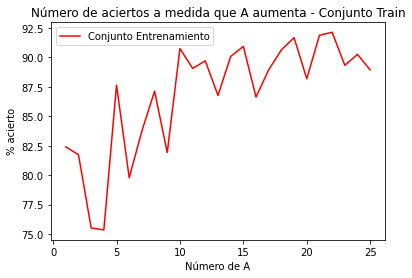

In [ ]:
plt.title('Número de aciertos a medida que A aumenta - Conjunto Train')
plt.ylabel('% acierto')
plt.xlabel('Número de A')
plt.plot(valoresA, valoresTrain_, color="red")
plt.legend(['Conjunto Entrenamiento'])
plt.show()

Ahora mostramos la gráfica usando el conjunto de validación.

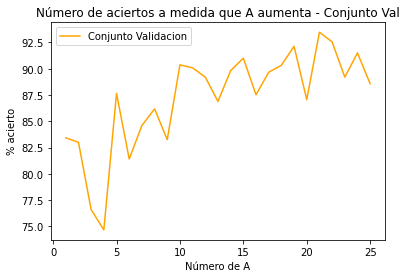

In [ ]:
plt.title('Número de aciertos a medida que A aumenta - Conjunto Val')
plt.ylabel('% acierto')
plt.xlabel('Número de A')
plt.plot(valoresA, valoresVal_, color="orange")
plt.legend(['Conjunto Validacion'])
plt.show()

Ahora generamos la gráfica usando el conjunto de test.

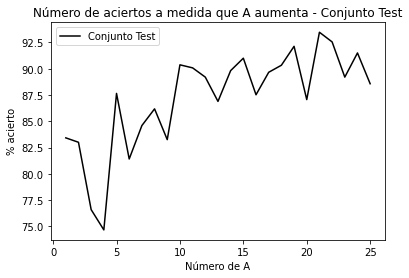

In [ ]:
plt.title('Número de aciertos a medida que A aumenta - Conjunto Test')
plt.ylabel('% acierto')
plt.xlabel('Número de A')
plt.plot(valoresA, valoresVal_, color="black")
plt.legend(['Conjunto Test'])
plt.show()

Finalmente, mostramos las tres gráficas superpuestas

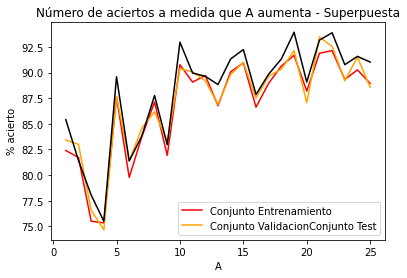

In [ ]:
plt.title('Número de aciertos a medida que A aumenta - Superpuesta')
plt.ylabel('% acierto')
plt.xlabel('Número de A')
plt.plot(valoresA, valoresTrain_, color="red")
plt.plot(valoresA, valoresVal_, color="orange")
plt.plot(valoresA, valoresTest_, color="black")
plt.legend(['Conjunto Entrenamiento', 'Conjunto Validacion' 'Conjunto Test'])
plt.show()

### **Prueba A constante y T varía**

La segunda prueba que vamos a realizar va a constar de que la A sea constante y que la T vaya incrementando poco a poco hasta 25.

In [ ]:
from tqdm import tqdm

T = 2
A = 15

valoresT1 = []
valoresTrain1 = []
valoresVal1 = []
valoresTest1 = []

#Creamos el conjunto de entrenamiento, validación y test para el digito 0
(conjuntoTrain, etiquetasTrain) = creaConjunto(X_Train, Y_Train, 0)
(conjuntoVal, etiquetasVal) = creaConjunto(X_Validation, Y_Validation, 0)
(conjuntoTest, etiquetasTest) = creaConjunto(X_Test, Y_Test, 0)

#Vamos a realizar 25 pruebas aleatorias
for i in tqdm(range(25)):
    cf = adaboost(conjuntoTrain, etiquetasTrain, T, A)
    resTrain = aplicar_clasificador_fuerte(conjuntoTrain, etiquetasTrain, cf)
    resVal = aplicar_clasificador_fuerte(conjuntoVal, etiquetasVal, cf)
    resTest = aplicar_clasificador_fuerte(conjuntoTest, etiquetasTest, cf)
    valoresTrain1.append(resTrain)
    valoresVal1.append(resVal)
    valoresTest1.append(resTest)
    valoresT1.append(T)
    T += 1

100%|██████████| 25/25 [03:00<00:00,  7.21s/it]


Guardaremos los valores al igual que antes para evitar la perdida.

In [ ]:
valoresT1_ = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
valoresTrain1_ = [65.93, 69.42, 77.7, 81.8, 84.34, 85.69, 84.24, 88.37, 90.93, 87.38, 88.86, 87.38, 89.31, 86.69, 88.23, 88.63, 92.4, 89.1, 92.33, 92.29, 90.45, 92.96, 92.08, 93.39, 92.78]
valoresTest1_ = [66.58, 69.44, 78.06, 84.59, 86.07, 88.47, 85.26, 89.59, 92.76, 89.18, 90.15, 87.76, 91.33, 88.42, 90.15, 88.88, 94.59, 90.97, 93.88, 94.18, 91.38, 95.05, 92.24, 94.08, 94.23]
valoresVal1_ = [65.08, 69.3, 77.68, 82.04, 85.51, 86.89, 84.0, 89.07, 91.42, 87.86, 88.74, 88.61, 89.15, 86.93, 89.24, 88.11, 93.55, 88.61, 92.29, 92.34, 90.83, 93.13, 91.62, 93.72, 93.68]


Primero generaremos la gráfica para el conjunto de entrenamiento.

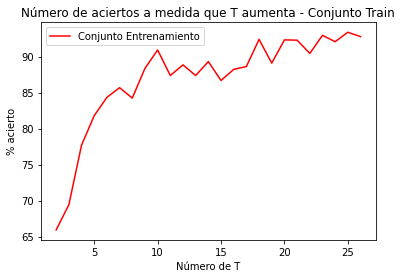

In [ ]:
plt.title('Número de aciertos a medida que T aumenta - Conjunto Train')
plt.ylabel('% acierto')
plt.xlabel('Número de T')
plt.plot(valoresT1_, valoresTrain1_, color="red")
plt.legend(['Conjunto Entrenamiento'])
plt.show()

En segundo lugar, creamos la gráfica para el conjunto de validación.

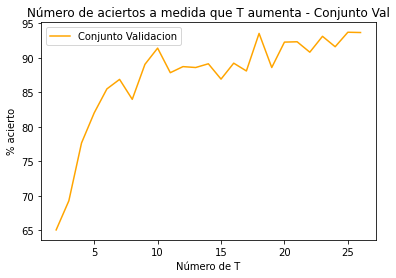

In [ ]:
plt.title('Número de aciertos a medida que T aumenta - Conjunto Val')
plt.ylabel('% acierto')
plt.xlabel('Número de T')
plt.plot(valoresT1_, valoresVal1_, color="orange")
plt.legend(['Conjunto Validacion'])
plt.show()

Ahora generamos la gráfica con el conjunto de Test

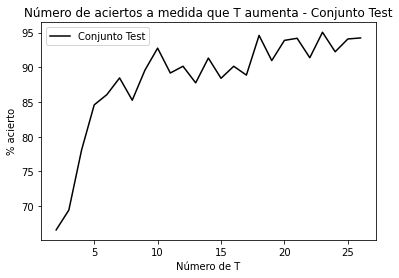

In [ ]:
plt.title('Número de aciertos a medida que T aumenta - Conjunto Test')
plt.ylabel('% acierto')
plt.xlabel('Número de T')
plt.plot(valoresT1_, valoresTest1_, color="black")
plt.legend(['Conjunto Test'])
plt.show()

Finalmente, generamos la gráfica superpuesta de los tres conjuntos.

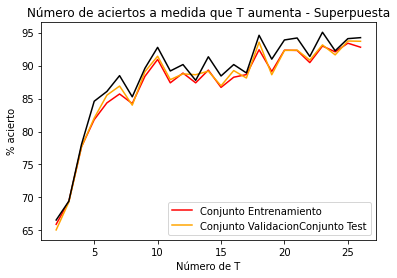

In [ ]:
plt.title('Número de aciertos a medida que T aumenta - Superpuesta')
plt.ylabel('% acierto')
plt.xlabel('Número de T')
plt.plot(valoresT1_, valoresTrain1_, color="red")
plt.plot(valoresT1_, valoresVal1_, color="orange")
plt.plot(valoresT1_, valoresTest1_, color="black")
plt.legend(['Conjunto Entrenamiento', 'Conjunto Validacion' 'Conjunto Test'])
plt.show()

# **Preguntas**

## **Explica brevemente cómo has adaptado la base datos MNIST al algoritmo AdaBoost.**

Esto ya lo hemos explicado anteriormente, a modo de explicación breve, es cambiar el conjunto MNIST_X, ya que cada imagen es una matriz de 28 x 28, lo tenemos que pasar a un vector de 784 posiciones, de esta forma podremos trabajar comodamente en el algoritmo, se ha usado la función reshape de *numpy*, ya que de esta forma podemos cambiar la forma de una imagen.

## **¿Cuál es el número de clasificadores que se han de generar para que un clasificador débil funcione? Muestra una gráfica que permita verificar lo que comentas**

Vamos a realizar una pequeña prueba donde empieza la A en un valor muy pequeño y lo vamos aumentando hasta 55, luego mostraremos una gráfica donde vemos el acierto en base al número de A.

In [ ]:
T = 10
A = 1

valoresA_pregunta = []
valoresTrain_pregunta = []
valoresVal_pregunta = []

#Creamos el conjunto de entrenamiento, validación y test para el digito 0
(conjuntoTrain, etiquetasTrain) = creaConjunto(X_Train, Y_Train, 0)
(conjuntoVal, etiquetasVal) = creaConjunto(X_Validation, Y_Validation, 0)

#Vamos a realizar 25 pruebas aleatorias
for i in tqdm(range(55)):
    cf = adaboost(conjuntoTrain, etiquetasTrain, T, A)
    resTrain = aplicar_clasificador_fuerte(conjuntoTrain, etiquetasTrain, cf)
    resVal = aplicar_clasificador_fuerte(conjuntoVal, etiquetasVal, cf)
    valoresTrain_pregunta.append(resTrain)
    valoresVal_pregunta.append(resVal)
    valoresA_pregunta.append(A)
    A += 1

100%|██████████| 55/55 [07:51<00:00,  8.57s/it]


In [ ]:
A_pregunta = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
Train_pregunta = [63.17, 69.92, 70.43, 71.77, 83.99, 78.18, 80.12, 84.28, 79.63, 84.69, 79.29, 85.24, 84.48, 87.44, 85.68, 86.37, 92.04, 84.24, 90.32, 92.18, 85.39, 84.45, 86.65, 90.74, 89.01, 90.89, 89.05, 90.65, 92.18, 91.39, 89.68, 92.21, 91.76, 87.9, 91.15, 90.25, 90.48, 90.42, 89.55, 89.0, 87.79, 90.96, 91.49, 90.34, 90.29, 88.9, 91.04, 90.58, 90.38, 91.13, 92.41, 91.39, 89.74, 91.38, 90.9]
Val_pregunta = [63.86, 68.97, 71.52, 70.69, 84.67, 79.65, 80.9, 83.38, 75.92, 85.05, 81.28, 85.47, 83.71, 87.56, 86.22, 85.93, 93.13, 85.26, 90.37, 93.43, 85.55, 85.26, 88.74, 90.08, 87.98, 91.54, 89.91, 91.16, 92.63, 91.92, 90.12, 92.5, 90.91, 88.36, 90.95, 89.7, 90.83, 90.91, 89.49, 89.7, 87.19, 92.59, 90.62, 91.21, 91.21, 89.66, 90.87, 91.16, 90.62, 91.83, 92.55, 91.79, 90.24, 91.75, 91.92]

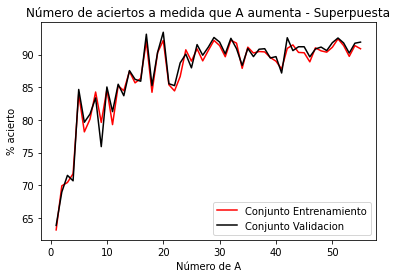

In [ ]:
#Generamos la gráfica
plt.title('Número de aciertos a medida que A aumenta - Superpuesta')
plt.ylabel('% acierto')
plt.xlabel('Número de A')
plt.plot(A_pregunta, Train_pregunta, color="red")
plt.plot(A_pregunta, Val_pregunta, color="black")
plt.legend(['Conjunto Entrenamiento', 'Conjunto Validacion'])
plt.show()

Como podemos apreciar en la gráfica anterior, teniendo un valor constante de T (10 he decidido) y aumentando poco a poco A, vemos que a partir del valor 30, el porcentaje de acierto comienza a estabilizarse, así pues el valor ideal de A sería alrededor de 40, preferiblemente 50, a partir de ese valor ya no aumenta mucho el acierto, por lo que para aumentar el acierto ya tendríamos que subir el valor de A.

## **¿Cómo afecta el número de clasificadores generados al tiempo empleado para el proceso de aprendizaje? ¿Qué importancia le darías? Justifica tu respuesta.**

Al final el tiempo viene condicionado por las variables T y A, a medida que estos valores aumentan el tiempo en entrenar comienza a subir, la idea es buscar unos valores que funcionen relativamente bien con un tiempo de entrenamiento que no llegue a ser prohibitivo, ya que a partir de ciertos valores de A y T, el tiempo que requiere es mucho.

Además, algo a destacar es que si tenemos un valor mayor de T será mejor que tener un valor alto de A, ya que cuanto mayor T tengamos tendremos más clasificadores que voten en la hipótesis.

## **¿Cómo has dividido los datos en conjunto de entrenamiento y test? ¿Para qué es útil hacer esta división?**

El hecho de que hagamos la división del conjunto de entrenamiento es muy útil, ya que de esta manera podremos usar todas las imágenes que nos proporciona el conjunto MNIST, si no hiciesemos esta división tendríamos un problema, el cual es que habría que buscar nuevas imágenes que cumplan con los requerimientos de la práctica, y pienso que eso puede llegar a ser complejo ya que el labor del etiquetado es muy largo.

La división la hemos hecho usando un 80% para entrenar y el resto para validar.

## **¿Has observado si se produce sobre entrenamiento? Justifica tu respuesta con una gráfica en la que se compare el error de entrenamiento y el de test a lo largo de las ejecuciones.**

No he encontrado sobreentrenamiento, pienso que el sobreentrenamiento podría ocurrir con unos valores de A y T muy altos, con las pruebas que he realizado no he conseguido que ocurra.

Aunque lo veremos más claro en un gráfica que vamos a generar, partimos con valores de T y A pequeños y los vamos aumentando.

In [ ]:
T = 1
A = 1

valoresA_sobreentrenamiento = []
valoresTrain_sobreentrenamiento = []
valoresVal_sobreentrenamiento = []

#Creamos el conjunto de entrenamiento, validación y test para el digito 0
(conjuntoTrain, etiquetasTrain) = creaConjunto(X_Train[:int(len(X_Train) / 2)], Y_Train[:int(len(X_Train) / 2)], 0)
(conjuntoVal, etiquetasVal) = creaConjunto(X_Validation[:int(len(X_Train) / 2)], Y_Validation[:int(len(X_Train) / 2)], 0)

#Vamos a realizar 4 pruebas aleatorias
for i in tqdm(range(4)):
    cf = adaboost(conjuntoTrain, etiquetasTrain, T, A)
    resTrain = aplicar_clasificador_fuerte(conjuntoTrain, etiquetasTrain, cf)
    resVal = aplicar_clasificador_fuerte(conjuntoVal, etiquetasVal, cf)
    valoresTrain_sobreentrenamiento.append(resTrain)
    valoresVal_sobreentrenamiento.append(resVal)
    valoresA_sobreentrenamiento.append(A)
    A += 40
    T += 40

Guardamos los valores.

In [ ]:
valoresA_T_overfitting = [1, 41, 81, 121]
valoresTrain_overfitting = [50.25, 95.09, 97.08, 97.82]
valoresVal_overfitting = [50.38, 94.72, 95.98, 96.86]

Mostramos las gráficas.

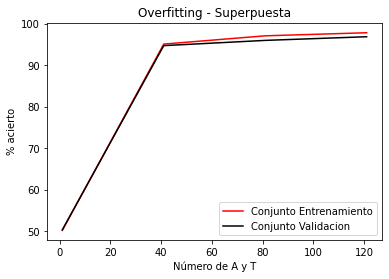

In [ ]:
#Generamos la gráfica
plt.title('Overfitting - Superpuesta')
plt.ylabel('% acierto')
plt.xlabel('Número de A y T')
plt.plot(valoresA_T_overfitting, valoresTrain_overfitting, color="red")
plt.plot(valoresA_T_overfitting, valoresVal_overfitting, color="black")
plt.legend(['Conjunto Entrenamiento', 'Conjunto Validacion'])
plt.show()

## **¿Cómo has conseguido que Adaboost clasifique entre los 10 dígitos cuando solo tiene una salida binaria?**

Para conseguir que AdaBoost clasifique entre los 10 tenemos que realizar una serie de cosas.
* Entrenar 10 clasificadores fuertes, uno por cada digito.
* Luego generar un conjunto de imagenes de prueba al azar.
* Sacar la categoria a la que pertenece cada imagen.

### **Entrenar 10 clasificadores**

In [ ]:
T = 30
A = 30


strongLearners = []
for i in range(10):
    (conjuntoTrain, etiquetasTrain) = creaConjunto(X_Train, Y_Train, i)
    cf = adaboost(conjuntoTrain, etiquetasTrain, T, A)
    strongLearners.append(cf)

### **Creación de Imágenes al Azar**

Elegiremos una cantidad de imagenes al azar.

In [ ]:
def eligeImagenesAzar(X, Y, cantidad):
    nuevoX = []
    nuevoY = []
    for i in range(cantidad):
        idx = rd.randint(0, len(X) - 1)
        nuevoX.append(X[idx])
        nuevoY.append(Y[idx])
    return (nuevoX, nuevoY)

In [ ]:
def aplicarClasificadorFuertePregunta(strongLearners, X, Y):
    tasa_aciertos = 0
    for x, imagen in enumerate(X):
        mejorClase = -1
        mejorAcumulador = -1
        for i, fuerte in enumerate(strongLearners):
            [hts, alphas] = fuerte
            sum = 0
            for j, ht in enumerate(hts):
                sum += alphas[j] * aplicar_clasificador_debil(ht, imagen)
            if sum > mejorAcumulador:
                mejorClase = i
                mejorAcumulador = sum
        if mejorClase == Y[x]:
              tasa_aciertos += 1
        #print("Categoria Real: ", Y[x] , " Categoria Predicción: ", mejorClase )
    if tasa_aciertos == None:
        tasa_aciertos = 0
    return tasa_aciertos

In [ ]:
cantidad = 20
(nuevoX, nuevoY) = eligeImagenesAzar(X, Y, cantidad)
tasa_aciertos = 0


res = aplicarClasificadorFuertePregunta(strongLearners, nuevoX, nuevoY)
print("Has acertado ", res, " de ", cantidad, " cantidad")

Categoria Real:  6  Categoria Predicción:  8
Categoria Real:  2  Categoria Predicción:  7
Categoria Real:  4  Categoria Predicción:  4
Categoria Real:  1  Categoria Predicción:  1
Categoria Real:  9  Categoria Predicción:  9
Categoria Real:  6  Categoria Predicción:  6
Categoria Real:  5  Categoria Predicción:  5
Categoria Real:  1  Categoria Predicción:  1
Categoria Real:  0  Categoria Predicción:  0
Categoria Real:  5  Categoria Predicción:  0
Categoria Real:  7  Categoria Predicción:  7
Categoria Real:  2  Categoria Predicción:  6
Categoria Real:  0  Categoria Predicción:  0
Categoria Real:  7  Categoria Predicción:  2
Categoria Real:  1  Categoria Predicción:  1
Categoria Real:  1  Categoria Predicción:  1
Categoria Real:  6  Categoria Predicción:  6
Categoria Real:  7  Categoria Predicción:  7
Categoria Real:  2  Categoria Predicción:  2
Categoria Real:  5  Categoria Predicción:  5
Has acertado  15  de  20  cantidad


Ahora hacemos unas pruebas para ver que porcentaje acierta.

In [ ]:
cantidad = 10
tamanyoPruebas = 3000
porcentaje_aciertos = 0
for x in range(tamanyoPruebas):
    (nuevoX, nuevoY) = eligeImagenesAzar(X, Y, cantidad)
    res = -1
    res = aplicarClasificadorFuertePregunta(strongLearners, nuevoX, nuevoY)
    porcentaje_aciertos += res

#Mostramos el acierto
tasa = (porcentaje_aciertos/len(nuevoX)) * 100
tasa /= tamanyoPruebas
print("Tasa: ", tasa)

Tasa:  77.02333333333333


## **Comenta detalladamente el funcionamiento de AdaBoost teniendo en cuenta que tasa media de fallos obtienes para aprendizaje y test. Correlaciona los porcentajes de acierto y de fallo con los valores de A y de T**

Esto ya lo hemos explicado con anterioridad, lo que quiero comentar es la relación entre los valores de T y A que toma el algoritmo con la tasa de acierto y fallos, a medida que aumente el valor de A o T la tasa de aciertos comienza a subir, pero llega un momento donde se estabiliza.

In [ ]:
T = 1
A = 1

valoresA_correlacion = []
valoresTrain_correlacion = []
valoresVal_correlacion = []

#Creamos el conjunto de entrenamiento, validación y test para el digito 0
(conjuntoTrain, etiquetasTrain) = creaConjunto(X_Train, Y_Train, 0)
(conjuntoVal, etiquetasVal) = creaConjunto(X_Validation, Y_Validation, 0)

#Vamos a realizar 25 pruebas aleatorias
for i in tqdm(range(30)):
    cf = adaboost(conjuntoTrain, etiquetasTrain, T, A)
    resTrain = aplicar_clasificador_fuerte(conjuntoTrain, etiquetasTrain, cf)
    resVal = aplicar_clasificador_fuerte(conjuntoVal, etiquetasVal, cf)
    valoresTrain_correlacion.append(resTrain)
    valoresVal_correlacion.append(resVal)
    valoresA_correlacion.append(A)
    A += 1
    T += 1

100%|██████████| 30/30 [04:46<00:00,  9.57s/it]


In [ ]:
listaA_T_correlacion = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
listaTrain_correlacion = [57.18, 68.85, 50.0, 52.3, 74.55, 74.6, 83.18, 72.7, 80.98, 88.85, 83.65, 86.57, 88.9, 85.29, 91.76, 90.39, 90.71, 84.98, 91.9, 92.43, 92.4, 93.16, 90.28, 92.45, 92.98, 93.37, 92.78, 92.5, 94.76, 93.43]
listaVal_correlacion = [58.58, 71.61, 50.0, 51.55, 74.12, 76.47, 81.24, 69.56, 80.11, 90.24, 85.09, 87.31, 88.48, 84.76, 91.25, 90.45, 90.58, 84.92, 91.21, 92.59, 91.21, 94.05, 90.28, 93.97, 92.71, 93.8, 92.55, 92.59, 93.84, 93.47]

In [ ]:
listaTrain_correlacionFallos = np.asarray(listaTrain_correlacion)
listaTrain_correlacionFallos = 100 - listaTrain_correlacionFallos
listaVal_correlacionFallos = np.asarray(listaVal_correlacion)
listaVal_correlacionFallos = 100 - listaVal_correlacionFallos

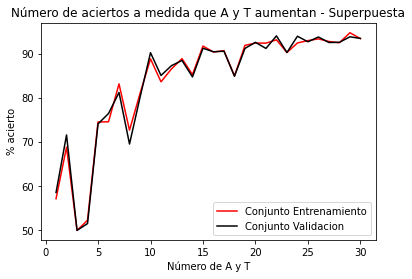

In [ ]:
#Generamos la gráfica
plt.title('Número de aciertos a medida que A y T aumentan - Superpuesta')
plt.ylabel('% acierto')
plt.xlabel('Número de A y T')
plt.plot(listaA_T_correlacion, listaTrain_correlacion, color="red")
plt.plot(listaA_T_correlacion, listaVal_correlacion, color="black")
plt.legend(['Conjunto Entrenamiento', 'Conjunto Validacion'])
plt.show()

En la gráfica anterior podemos comprobar lo que he dicho anteriormente, a medidas que los valores de T y A van aumentando, el porcentaje de aciertos se comienza a estabilizarse.

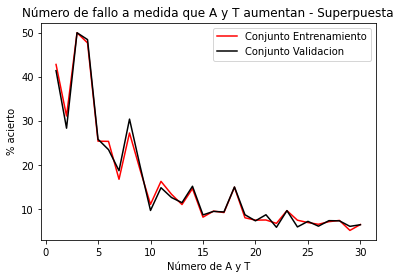

In [ ]:
#Generamos la gráfica
plt.title('Número de fallo a medida que A y T aumentan - Superpuesta')
plt.ylabel('% acierto')
plt.xlabel('Número de A y T')
plt.plot(listaA_T_correlacion, listaTrain_correlacionFallos, color="red")
plt.plot(listaA_T_correlacion, listaVal_correlacionFallos, color="black")
plt.legend(['Conjunto Entrenamiento', 'Conjunto Validacion'])
plt.show()

En la gráfica anterior podemos observar lo mismo, que a medida que A y T aumentan el error empieza a bajar.

# **Lectura de una imagen nuestra**

Para leer una imagen nuestra usaremos 3 librerias, **matplotlib**, **numpy** y **opencv**. Y el codigo es el siguiente.

In [ ]:
#Importamos el codigo
import numpy as np
import cv2
import matplotlib.pyplot as plt
#Esto lo ponemos porque estamos usando un cuadernillo Jupyter
%matplotlib inline

#Aqui leemos una imagen en escala de grises
img = cv2.imread('/rutaImagen/imagen.png', 0) 
plt.imshow(img, cmap='gray')